### Labotratorio #4:

#### Autor:
Alejandro Gómez 20347

#### Curso:
Inteligencia Artificial



In [116]:
# Librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

### Pasos que se siguieron:

#### 1. Realizar un análisis exploratorio de los datos (EDA):
En este, se analizó y visaulizó la data para entender la relación entre variables, distribución y otras características de los datos.

#### 2. Preprocesamiento de los datos:
Para este paso, se realizó limpieza de datos. Esto, teniendo el entendimiento previo de los datos, preparando la data para aplicar el modelo

#### 3. Aplicar un modelo:
En este paso, se ajustó un modelo logístico polinomial. Así como también su implementación vectorial. Así como también uso de cross-validation.


In [117]:
# Task 1.1
# Leer CSV
framingham = pd.read_csv('framingham.csv')

In [118]:
# Head de datos
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Análisis exploratorio de datos usando seaborn para visualizar

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

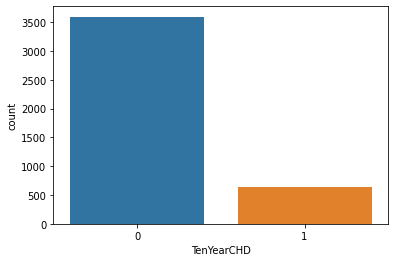

In [119]:
# Gráfico de barras de TenYearCHD
sns.countplot(x='TenYearCHD', data=framingham)

<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

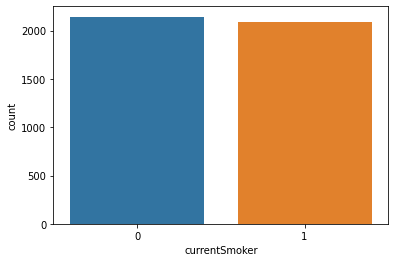

In [120]:
# Gráfico de barras de currentSmoker
sns.countplot(x='currentSmoker', data=framingham)

<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

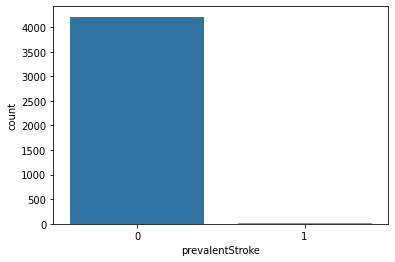

In [121]:
# Gráfico de barras de prevalentStroke
sns.countplot(x='prevalentStroke', data=framingham)

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

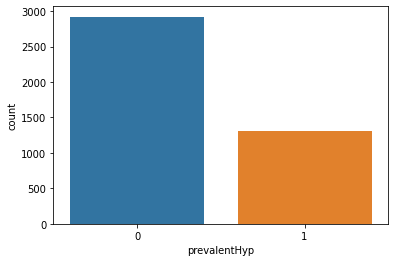

In [122]:
# Gráfico de barras de prevalentHyp
sns.countplot(x='prevalentHyp', data=framingham)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

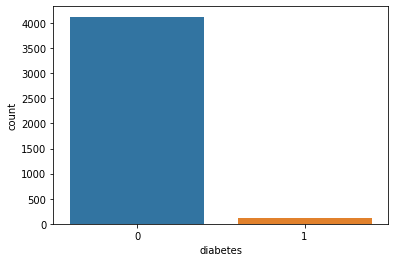

In [123]:
# Gráfico de barras de diabetes
sns.countplot(x='diabetes', data=framingham)

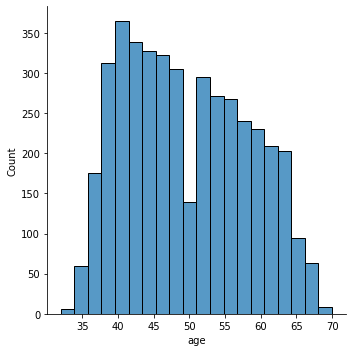

In [124]:
# Histograma de edad
sns.displot(framingham['age'], kde=False, bins=20)

<AxesSubplot:xlabel='education', ylabel='count'>

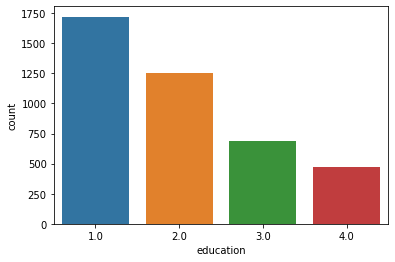

In [125]:
# Histograma de education
sns.countplot(x='education', data=framingham)

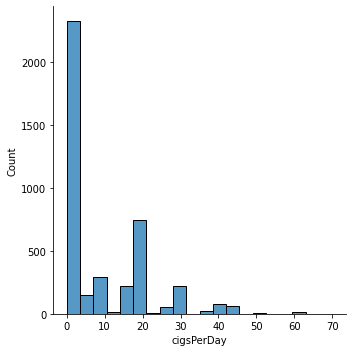

In [126]:
# Histograma de cigsPerDay
sns.displot(framingham['cigsPerDay'], kde=False, bins=20)

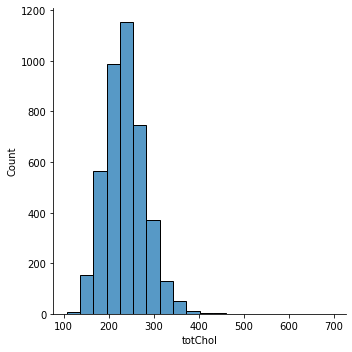

In [127]:
# Histograma de totChol
sns.displot(framingham['totChol'], kde=False, bins=20)

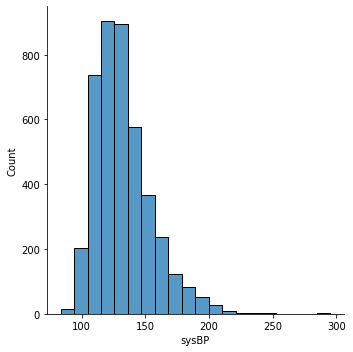

In [128]:
# Histograma de sysBP
sns.displot(framingham['sysBP'], kde=False, bins=20)

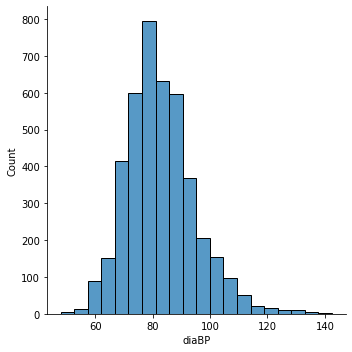

In [129]:
# Histograma de diaBP
sns.displot(framingham['diaBP'], kde=False, bins=20)

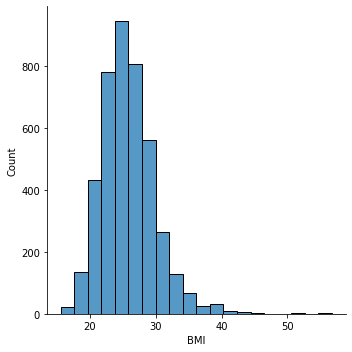

In [130]:
# Histograma de BMI
sns.displot(framingham['BMI'], kde=False, bins=20)

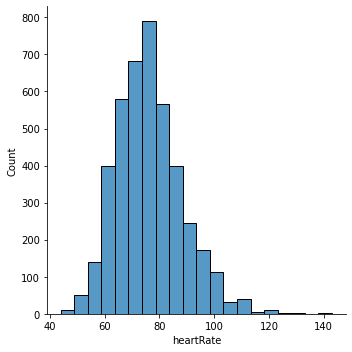

In [131]:
# Histograma de heartRate
sns.displot(framingham['heartRate'], kde=False, bins=20)

<AxesSubplot:xlabel='male', ylabel='count'>

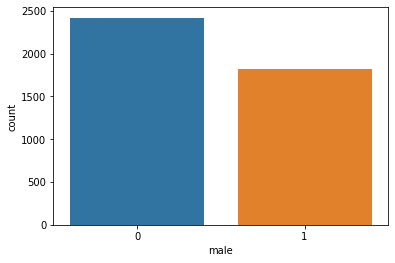

In [132]:
# Gráfico de barras de male
sns.countplot(x='male', data=framingham)

<AxesSubplot:>

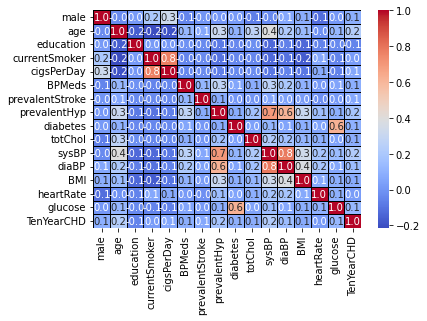

In [133]:
# Gráfico de correlación usando seaborn
sns.heatmap(framingham.corr(), annot=True, cmap='coolwarm', fmt='.1f', linewidths=1, linecolor='black')

<AxesSubplot:xlabel='heartRate', ylabel='age'>

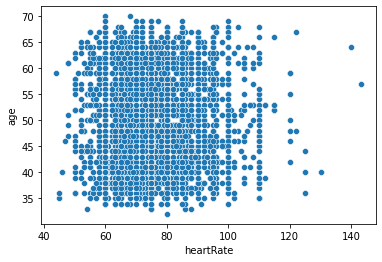

In [134]:
# Boxplot
sns.scatterplot(x='heartRate', y='age', data=framingham)

<AxesSubplot:xlabel='TenYearCHD', ylabel='education'>

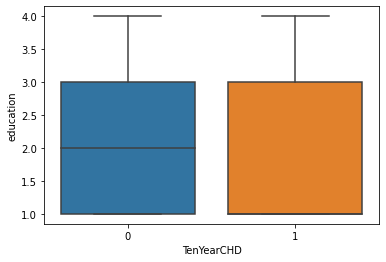

In [135]:
# Boxplot
sns.boxplot(x='TenYearCHD', y='education', data=framingham)

<AxesSubplot:xlabel='heartRate', ylabel='cigsPerDay'>

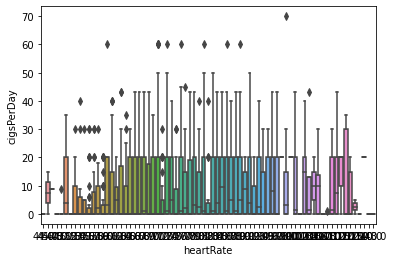

In [136]:
# Boxplot
sns.boxplot(x='heartRate', y='cigsPerDay', data=framingham)

<AxesSubplot:xlabel='TenYearCHD', ylabel='totChol'>

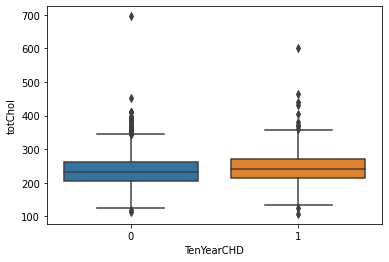

In [137]:
# Boxplot
sns.boxplot(x='TenYearCHD', y='totChol', data=framingham)

In [138]:
# Estadística descrptiva
DataAntesProcesar = framingham.describe()
print(DataAntesProcesar)

              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   

##### Limpieza de datos

In [161]:
framingham = framingham.replace([np.inf, -np.inf], np.nan)

# Buscar datos atípicos
if framingham.isin([np.nan, np.inf, -np.inf]).any().any():
    print('Hay datos atípicos')    
else:
    print('No hay datos atípicos')

No hay datos atípicos


In [140]:
framingham = framingham.fillna(framingham.mean())

# Buscar valores nulos
if framingham.isnull().values.any():
    print('Hay valores nulos')    
else:
    print('No hay valores nulos')

No hay valores nulos


In [141]:
framingham = framingham.drop_duplicates()

# Buscar valores duplicados
if not framingham.duplicated().values.any():
    print("Valores duplicados:", framingham.duplicated().values.any())

Valores duplicados: False


In [142]:
# Estadística descrptiva
DataProcesada = framingham.describe()
print(DataProcesada)

              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4238.000000    4238.000000  4238.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.007075       0.500024    11.879230   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

           BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4238.00000      4238.000000   4238.000000  4238.000000  4238.000000   
mean      0.02963         0.005899      0.310524     0.025720   236.721585   
std       0.16852         0.076587      0.462763     0.158316    44.326453   
min

In [143]:
# Se verifica si hubo cambios en la estadística descriptiva

if DataAntesProcesar.equals(DataProcesada):
    print('No hubo cambios en la estadística descriptiva')
else:
    print('Hubo cambios en la estadística descriptiva\n')
    print("1. Verificación de datos atípicos \n2. Datos nulos \n3. Datos duplicados")

Hubo cambios en la estadística descriptiva

1. Verificación de datos atípicos 
2. Datos nulos 
3. Datos duplicados


#### Modelo logístico polinomial

In [144]:

# Import de librerías
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import auc, roc_curve

In [145]:
# Variables independientes
X = framingham[['age', 'cigsPerDay', 'totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

# Variable dependiente
y = framingham['TenYearCHD']

In [146]:
# Training y test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [147]:
# Modelo de regresión logística polinomial
model = make_pipeline(PolynomialFeatures(2), LogisticRegression())
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression', LogisticRegression())])

In [148]:
# Predicciones
y_pred = model.predict(X_test)

In [149]:

# Métricas

# Accuracy
accuracy = model.score(X_test, y_test)
accuracy = float("{0:.4f}".format(accuracy))

print("Accuracy:", accuracy)

#ROC
roc = metrics.roc_auc_score(y_test, y_pred)
roc = float("{0:.4f}".format(roc))
print("ROC:", roc)

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)



Accuracy: 0.8396
ROC: 0.5218


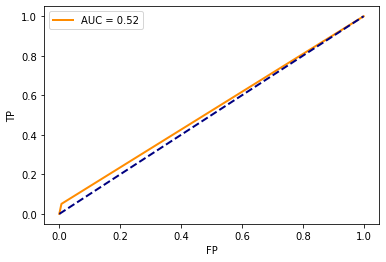

In [150]:
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
sns.lineplot(x=[0, 1], y=[0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('FP')
plt.ylabel('TP')

plt.show()


<AxesSubplot:>

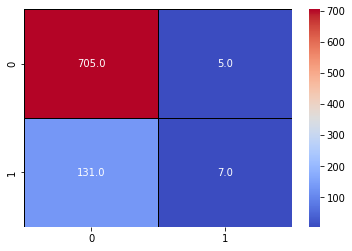

In [151]:
# Matriz de confusión
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='.1f', linewidths=1, linecolor='black')

#### Análisis de resultados:

Como se oberva en los valores obtenidos, el modelo logístico polinomial usado, no está actuando como se espera. Inicialmente, tomando solo la Accuracy, parecería que es un buen modelo, sin embargo el ROC nos inidica que no es así. Por lo tanto, se debe ajustar el modelo para que este tenga un mejor desempeño

#### Implementación vectorial del algoritmo de regresión logística

In [152]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
clf = LogisticRegression(solver='sag', max_iter=10000, tol=1e-6)
clf.fit(X_train_poly, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=10000, solver='sag', tol=1e-06)

In [153]:
# Métricas

# Accuracy
accuracy = clf.score(X_test_poly, y_test)
accuracy = float("{0:.4f}".format(accuracy))
print("Accuracy:", accuracy)

y_pred = clf.predict(X_test_poly)
y_prob = clf.predict_proba(X_test_poly)[:,1]

roc = roc_auc_score(y_test, y_prob)
roc = float("{0:.4f}".format(roc))
print("ROC:", roc)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


Accuracy: 0.8408
ROC: 0.5756


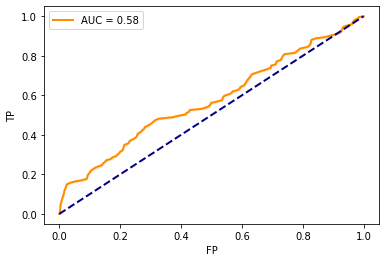

In [154]:

sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
sns.lineplot(x=[0, 1], y=[0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('FP')
plt.ylabel('TP')
plt.show()


<AxesSubplot:>

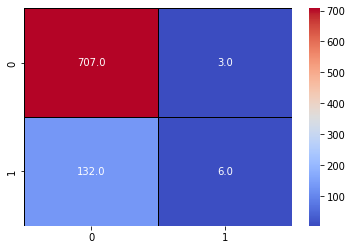

In [155]:
# Matriz de confusion
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='.1f', linewidths=1, linecolor='black')

#### Análisis de resultados:

Ahora, el modelo ha presentado un accuracy que es bastante similar, sin embargo, el avance se encuentra en el ROC, el cual ha mejorado. Esto indica que el modelo ahora es mejor comparando positivos y negativos.

#### Cross-validation

In [156]:
from sklearn.model_selection import cross_val_score

Score = []
Grados = np.arange(1, 16)
Score = [np.mean(cross_val_score(make_pipeline(PolynomialFeatures(i), LogisticRegression()), X, y, cv=2)) for i in Grados]
Grado = Grados[np.argmax(Score)]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [157]:
print("El grado óptimo es:", Grado)
print("El score óptimo es:", np.max(Score))

El grado óptimo es: 1
El score óptimo es: 0.849929211892402


#### Análisis de resultados:

Observando el resultado del cross-validation, se observa que el grado óptimo es 1; esto significa que tiene un mejor desempeño sin features polinomiales. Así que la data se comporta mejor con un modelo lineal. Por este motivo, se adaptará el modelo para que use solo features lineales.

In [158]:
clf = LogisticRegression(solver='sag', max_iter=10000, tol=1e-6)

# Train the model
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=10000, solver='sag', tol=1e-06)

Accuracy: 0.8384
ROC: 0.6399


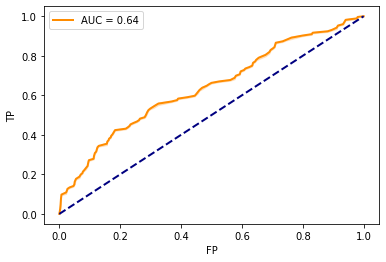

In [159]:
# Métricas

# Accuracy
accuracy = clf.score(X_test, y_test)
accuracy = float("{0:.4f}".format(accuracy))
print("Accuracy:", accuracy)

y_pred = clf.predict(X_test)
y_prob = clf.decision_function(X_test)

roc = roc_auc_score(y_test, y_prob)
roc = float("{0:.4f}".format(roc))
print("ROC:", roc)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# ROC curve
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
sns.lineplot(x=[0, 1], y=[0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('FP')
plt.ylabel('TP')

plt.show()



<AxesSubplot:>

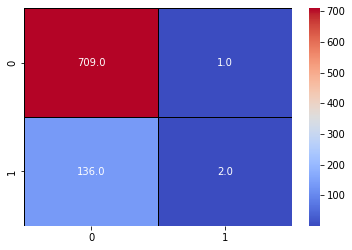

In [160]:
# Matriz de confusion
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='.1f', linewidths=1, linecolor='black')

#### Análisis de resultados:

Se observa que este último modelo fue el que mejor desempeño tuvo. Al analizar el valor de ROC, fue el más alto, observable también en el gráfico. Como conclusión se tiene que el modelo que mejor se ajustó a los datos fue el último presentado. Este modelo, usó cross-validation para determinar el grado óptimo, el cual fue 1. Esto, debido a que el modelo lineal tuvo un mejor desempeño que el modelo polinomial. Cabe destacar que el análisis exploratorio de datos previo fue de mucha utilidad para entender el dataset y así poder aplicar el modelo de mejor manera.